# 保存和加载网络

## 1. 保存

In [15]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [3]:
# 为CPU设置随机数种子，使得生成的随机序列是确定的
torch.manual_seed(1)

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [29]:
def show_res(x, y, pre):
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pre.data.numpy(), 'r-', lw=5)

In [38]:
def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    # 训练
    for t in range(1000):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    show_res(x, y, prediction)
    torch.save(net1, 'net.pkl')
    torch.save(net1.state_dict(), 'net_params.pkl')

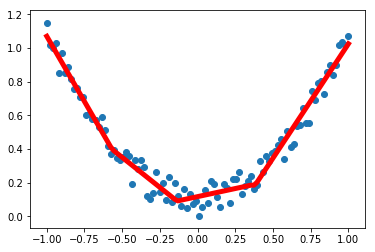

In [51]:
save()

## 2. 加载

In [52]:
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    show_res(x, y, prediction)

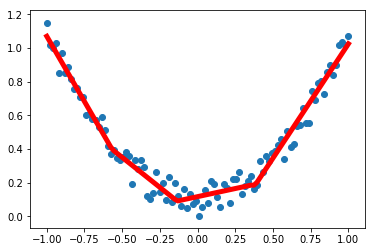

In [53]:
restore_net()

In [56]:
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    show_res(x, y, prediction)

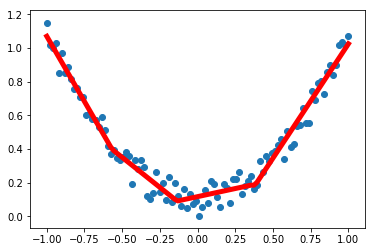

In [57]:
restore_params()